# Сборный проект: анализ закономерностей успешности продаж игры

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). <br>Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. <br>Также нужно отработать принцип работы с данными, чтобы можно было прогнозировать продажи на будущее

## Шаг 1. Общий обзор данных

In [ ]:
#подключаем библиотеку pandas и numpy
import pandas as pd
import numpy as np

In [ ]:
try:
    df = pd.read_csv('D:\datasets\games.csv', sep = ',') #записываем данные из файла в переменную df
except:
    df = pd.read_csv('/datasets/games.csv', sep = ',') #записываем данные из файла в переменную df

In [1]:
df.info() #общая информация о датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В столбцах Critic_Score, User_score и Rating присутствует значительное количество пропущенных данных, так как они являются мерой оценки игр можно предположить, что данные пропущены из-за их отсутствия в исходном источнике <br>В некоторых из оставшихся столбцов присутвет незначительное количество пропущенных данных.

In [2]:
df.head()# выводим на экран первые 5 строк датафрейма

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Теперь у нас есть общее представление о количестве пропусков, типах значений в столбцах и самих значениях

array([[<AxesSubplot:title={'center':'Year_of_Release'}>,
        <AxesSubplot:title={'center':'NA_sales'}>],
       [<AxesSubplot:title={'center':'EU_sales'}>,
        <AxesSubplot:title={'center':'JP_sales'}>],
       [<AxesSubplot:title={'center':'Other_sales'}>,
        <AxesSubplot:title={'center':'Critic_Score'}>]], dtype=object)

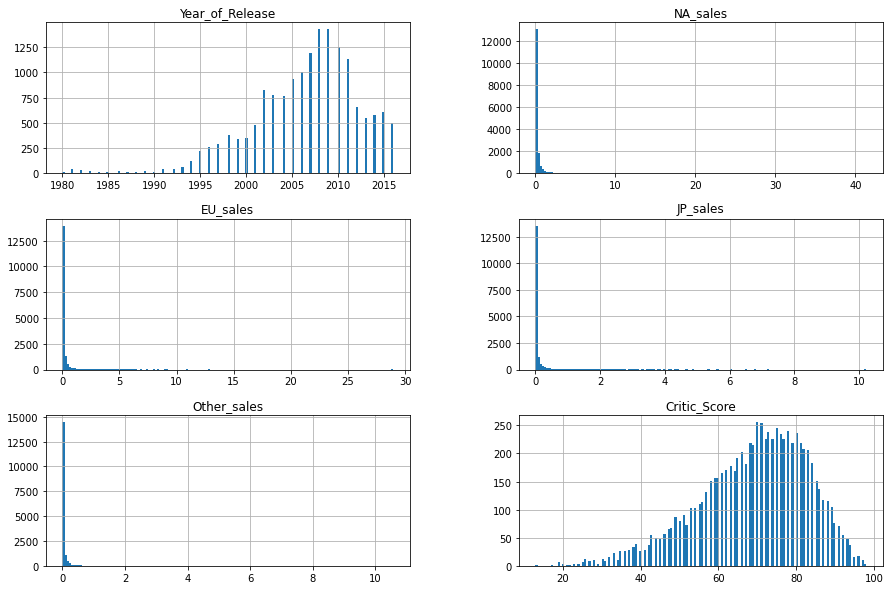

In [3]:
df.hist(bins=150, figsize=(15,10))# гистограммы для числовых столбцов

<AxesSubplot:>

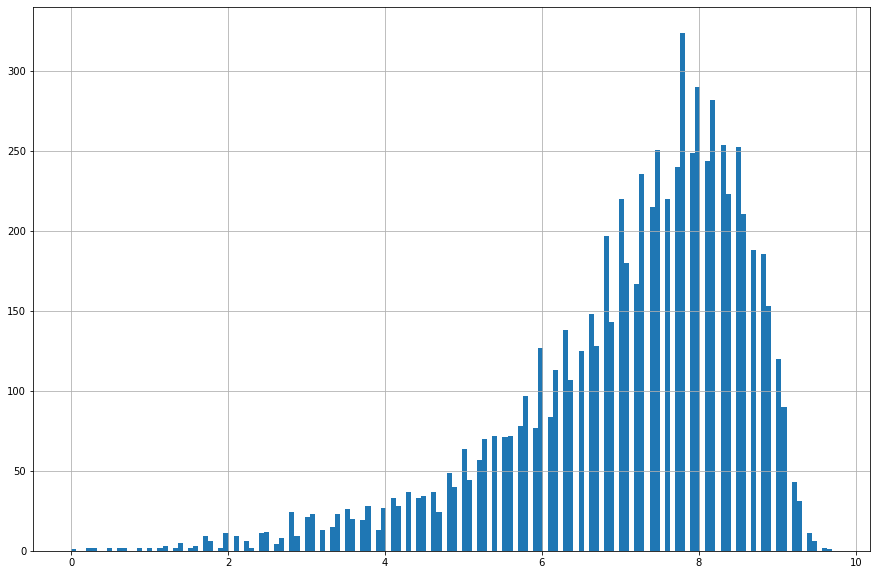

In [4]:
df.query('User_Score != "tbd"')['User_Score'].astype('float64').hist(bins=150, figsize=(15,10))# гистограмма столбца user_score

Наблюдается рост количества выпущенных игр с пиком в 2008-2009 годах, затем постепенный спад, а после 2010 график выравнивается <br> Большинство игр из датасета оценены критиками от 60 до 80 баллов, пользователями от 6.5 до 8.5<br>В столбцах с продажами по регионам представлены непрерывные значения, по масштабу графиков можно сказать, что больше всего продаж происходит в Северной Америке, затем идет Европа, а после Япония и другие страны<br>столбцы с продажами по регионам в будущем будем смотреть в разбивке по различным категориям, так как графики получились не информативные

<AxesSubplot:ylabel='Platform'>

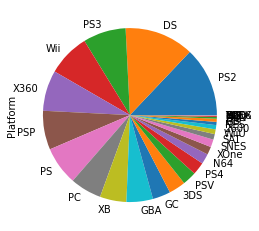

In [5]:
df['Platform'].value_counts().plot(kind='pie')# строим круговую диаграмму

На диаграмме наглядно показаны доли различных игровых приставок в датафрейме, больше всего игр на ps2 и nintendo ds

<AxesSubplot:ylabel='Genre'>

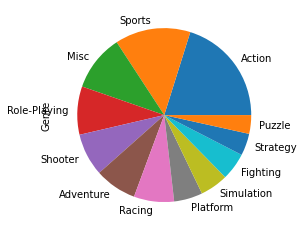

In [6]:
df['Genre'].value_counts().plot(kind='pie')# строим круговую диаграмму

На диаграмме наглядно показаны доли различных жанров игр в датафрейме, больше всего игр в жанре экшн

<AxesSubplot:ylabel='Rating'>

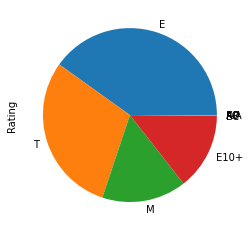

In [7]:
df['Rating'].value_counts().plot(kind='pie')# строим круговую диаграмму

На диаграмме наглядно показаны доли различных возрастных рейтингов в датафрейме, больше всего игр в рейтинге E - для всех возрастов, затем T - от 13 лет, далее M - от 17 лет, E10+ - для всех старше 10, игр с остальными рейтингами представлено незначительное количество

## Шаг 2. Предобработка данных

### 1. Наименования столбцов

Приведем все названия столбцов к нижнему регистру

In [8]:
df. columns = df.columns.str.lower()

<div class="alert-success"> 
<b>Комментарий ревьюера 👍 </b>

Хвалю, что используешь str.lower, а не громоздкие неоптимальные конструкции

### 2. Преобразование типов данных

In [9]:
df.dtypes #смотри, какие типы данных пресутсвуют в столбцах

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

Поменяем значения столбца year_of_release на datetime64, чтобы в дальнейшем можно было проводить анализ по этому показателю

In [10]:
df['year_of_release'] = pd.to_datetime(df['year_of_release'], format='%Y').dt.year

Поменяем значения столбца critic_score на целочисленные, так у них нет дробной части

In [11]:
df = df.astype({'critic_score': 'Int64'})# меняем тип данных столбца на int

Значения столбцов с количеством проданных копий по регионам можно поменять на целые числа и привести к миллионам, но это никак не повлияет на анализ, пропускаем

В столбце user_score смешанный тип данных, посмотрим, почему так произошло

In [12]:
df.user_score.value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
9.6       2
0.9       2
2.3       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

Аббревиатура tbd значит, что оценка еще не была определена, TBD (to be determined = будет определено). В нашем случае можно считать, что данные пропущенны, приведем их к nan

In [13]:
df = df.replace('tbd', np.nan)# меняем значения tbd на nan
df = df.astype({'user_score': 'float64'})# приводим тип данных колонки к float

### 3. Обзор пропущенных значений

In [14]:
df.isna().sum()#сумма пропущенных значений в каждом столбце

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

В столбцах Name, Genre и Year_of_Release пропущенных данных незначительное количество, можем удалить из датафрейма, на выборку это не повлияет

In [15]:
df = df.dropna(subset=['name', 'genre', 'year_of_release']) #удаляем пропуски из столбцов

В столбцах critic_Score, user_score и rating пропущено значительное количество значений, нужно выяснить, чем их заполнить.<br>Для начала проверим, взаимосвязаны ли эти пропуски

In [16]:
df.loc[(df['critic_score'].isna()) & (df['user_score'].isna()) & (df['rating'].isna())]# смотрим, сколько в датафрейме строк, где пропущены все 'оценочные' метрики

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,<NA>,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,<NA>,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,<NA>,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,<NA>,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,<NA>,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,<NA>,NaN,NaN


Большинство пропусков столбцов critic_score, user_score, rating напрямую взаимосвязаны, около 2000 пропусков столбца critic_score возникли отдельно от остальных. Можно предположить, что информация об оценках и рейтингах берется из определенного источника, в котором отсутствуют данные по некоторым играм, годам, приставкам и т.д. <br> Заполнить все пропуски медианой или средним не получится, так как их в датасете слишком много и мы можем потерять другие ценные данные из "нормальных" столбцов, а также данные по каждой игре слишком самобытны и могут сильно отличаться в зависимости от платформы, оставим их

### 4. Удаление дубликатов

In [17]:
df.drop_duplicates(inplace=True)#удаление явных дубликатов

Неявные дубликаты могут быть в столбцах platform, genre, name и rating.

In [18]:
df.platform.unique()# проверяем уникальные значения столцба

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

Неявные дубликаты отсутствуют

In [19]:
df.genre.unique()# проверяем уникальные значения столцба

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

Неявные дубликаты отсутствуют

In [20]:
df.name.unique()# проверяем уникальные значения столцба

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Woody Woodpecker in Crazy Castle 5', 'LMA Manager 2007',
       'Haitaka no Psychedelica'], dtype=object)

Данные выглядят чистыми, дубликаты здесь можно не искать, так как это не сильно повлияет на результат исследования

In [21]:
df.rating.unique()# проверяем уникальные значения столцба

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

### 5. Обработка аномальных значений

In [22]:
df['year_of_release'].value_counts()# подсчет значений столбца

2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1987.0      16
1990.0      16
1988.0      15
1984.0      14
1985.0      14
1980.0       9
Name: year_of_release, dtype: int64

Аномальные значения в столбце year_of_release отсутствуют

In [23]:
df['na_sales'].value_counts()

0.00     4449
0.02      562
0.03      554
0.04      543
0.05      536
         ... 
14.44       1
13.96       1
2.35        1
2.96        1
4.40        1
Name: na_sales, Length: 401, dtype: int64

Аномальные значения отсутствуют, однако многие игры не продавались (0) в регионе NA, а некоторые продавались в больших объемах, что может сильно повлиять на среднее значение, это нужно учесть при дальнейшем анализе

In [24]:
df['eu_sales'].value_counts()

0.00    5766
0.01    1467
0.02    1290
0.03     911
0.04     702
        ... 
9.14       1
1.92       1
3.86       1
2.59       1
3.87       1
Name: eu_sales, Length: 307, dtype: int64

Аномальные значения отсутствуют, однако многие игры не продавались (0) в регионе EU, а некоторые продавались в больших объемах, что может сильно повлиять на среднее значение, это нужно учесть при дальнейшем анализе

In [25]:
df['jp_sales'].value_counts()

0.00    10300
0.02      733
0.01      697
0.03      540
0.04      391
        ...  
3.84        1
1.17        1
3.03        1
2.66        1
1.71        1
Name: jp_sales, Length: 244, dtype: int64

Аномальные значения отсутствуют, однако многие игры не продавались (0) в регионе JP, а некоторые продавались в больших объемах, что может сильно повлиять на среднее значение, это нужно учесть при дальнейшем анализе

In [26]:
df['other_sales'].value_counts()

0.00    6492
0.01    3398
0.02    1596
0.03     910
0.04     641
        ... 
0.72       1
2.11       1
0.96       1
1.48       1
3.96       1
Name: other_sales, Length: 155, dtype: int64

Аномальные значения отсутствуют, однако многие игры не продавались (0) в остальных регионах, а некоторые продавались в больших объемах, что может сильно повлиять на среднее значение, это нужно учесть при дальнейшем анализе

### 6. Добавление столбца с суммарными продажами

In [27]:
df['total_sales'] = df['jp_sales'] + df['eu_sales'] + df['na_sales'] + df['other_sales']# суммируем продажи игры во всех регионах

## Шаг 3. Исследовательский анализ данных

### 1. Количество игр, выпущенные в разные годы

<AxesSubplot:>

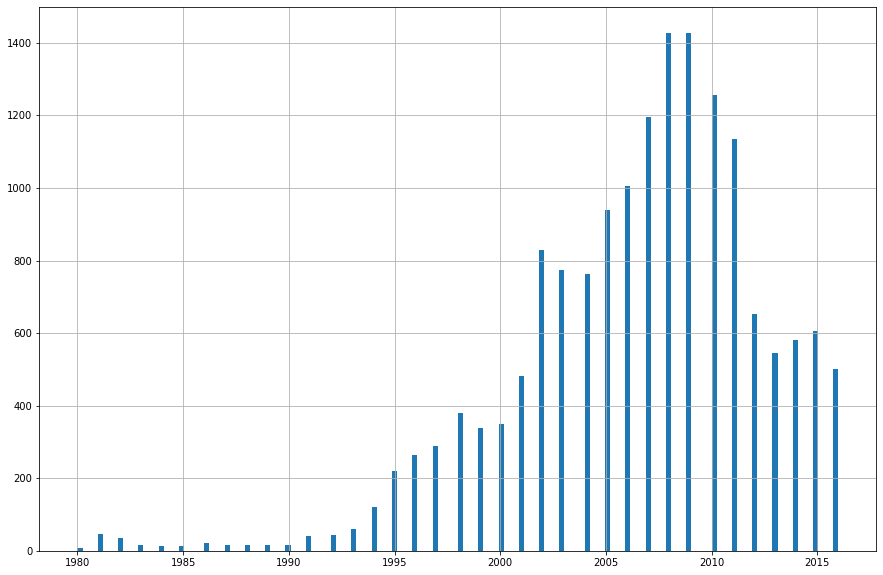

In [28]:
df.year_of_release.hist(bins=150, figsize=(15,10))# строим гистограмму по столбцу с годом выпуска игр

Наиболее актуальными являются данные за последние 10 лет, так как в этот период устоялись наиболее актуальные принципы разработки игр и их маркетинга, однако убирать более старые данные не стоит, так как их можно будет сгруппировать или игнорировать с помощью среза

### 2. Продажи по платформам

In [29]:
df.pivot_table(values = 'total_sales', index='platform', aggfunc='sum')# сводная таблица суммарных продаж по платформам

,total_sales
platform,
2600,86.48
3DO,0.10
3DS,257.81
DC,15.95
DS,802.78
GB,254.43
GBA,312.88
GC,196.73
GEN,28.35


Возьмем топ 10 платформ по продажам за основу и построим график по годам

<AxesSubplot:xlabel='year_of_release'>

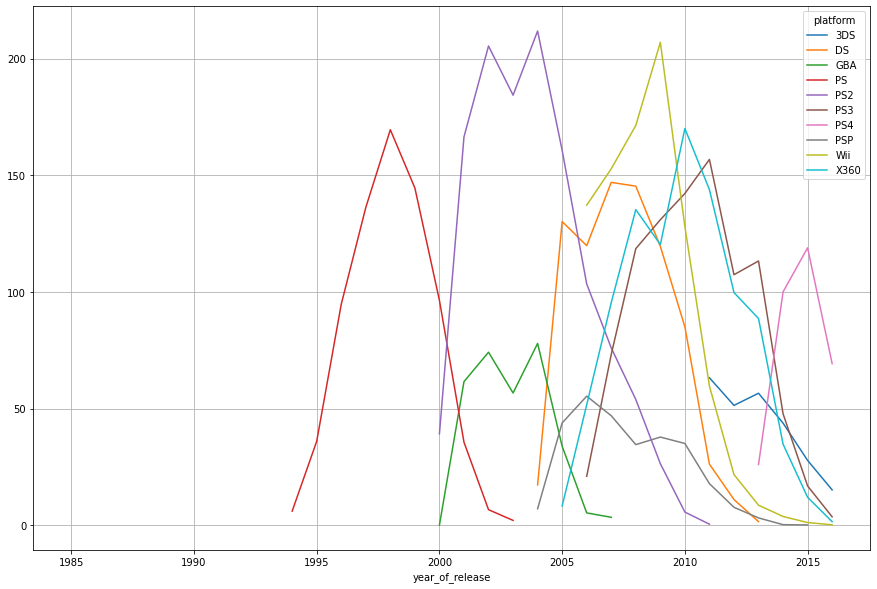

In [30]:
df.query('platform in ["PS2", "X360", "PS3", "Wii", "DS", "PS", "PS4", "GBA", "PSP", "3DS"]')\
    .pivot_table(values = 'total_sales', columns='platform',index='year_of_release', aggfunc='sum')\
    .plot(figsize=(15,10),  grid=True)
# делаем срез с топ 1 платформами, строим сводную таблицу по годам выпуска и строим график

Так как данные до 2016 года, о характерной продолжительности жизни платформы мы можем судить только по уже закрытым или с очень низкими продажами в последний годы, в среднем, платформы живут около 10 лет, что хорошо видно по графику, при этом у них всех есть пик продаж в определенный год, после чего идет характерное снижение продаж.

### 3. Выбор актуальных данных

Актуальными будем считать данные с 2013, в этом году появилась платформа PS4 - она вошла в топ 10 по продажам за всю историю игровой индустрии, при этом являясь наиболее актуальной, так как ее жизненный цикл еще не дошел до половины, если смотреть на среднее время жизни платформ.

In [31]:
df_actual = df.query('year_of_release >= 2013')# делаем срез с данными с 2013 года

### 4. Анализ продаж и других показателей платформ

<AxesSubplot:xlabel='year_of_release'>

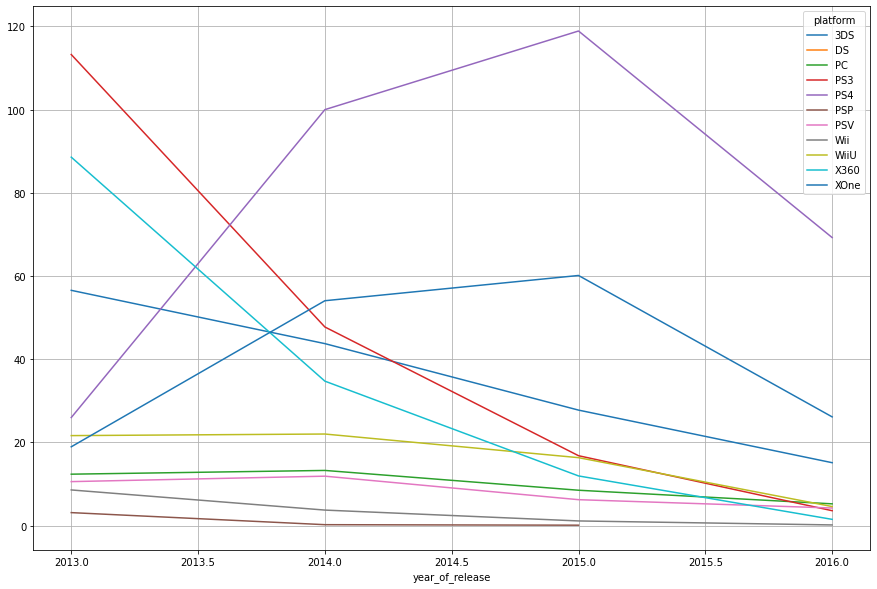

In [32]:
df_actual.pivot_table(values = 'total_sales', columns='platform',index='year_of_release', aggfunc='sum') \
    .plot(figsize=(15,10),  grid=True)# строим такой же график, как выше, но с актуальными платформами

На 2016 год для следующих платформ все еще продаются игры: XOne, PSV, PC, 3DS, PS3, WiiU, X360. У всех из этих платформ наблюдается спад продаж, что может быть связано с общим уменьшением количества игр. Из перечисленных потенциально прибыльными можно назвать **PS4, XOne и 3DS**, так как они имеют неплохие показатели продаж и существуют от 5 до 3 лет, что половина или меньше от примерного среднего жизненного цикла консолей, который мы выявили ранее(10 лет). Отдельно можно выделить **PC**, так как он не имеет цикла жизни и будет актуален еще долго как игровая платформа, хоть и имеет достаточно небольшие продажи игр.

<AxesSubplot:title={'center':'total_sales'}, xlabel='platform'>

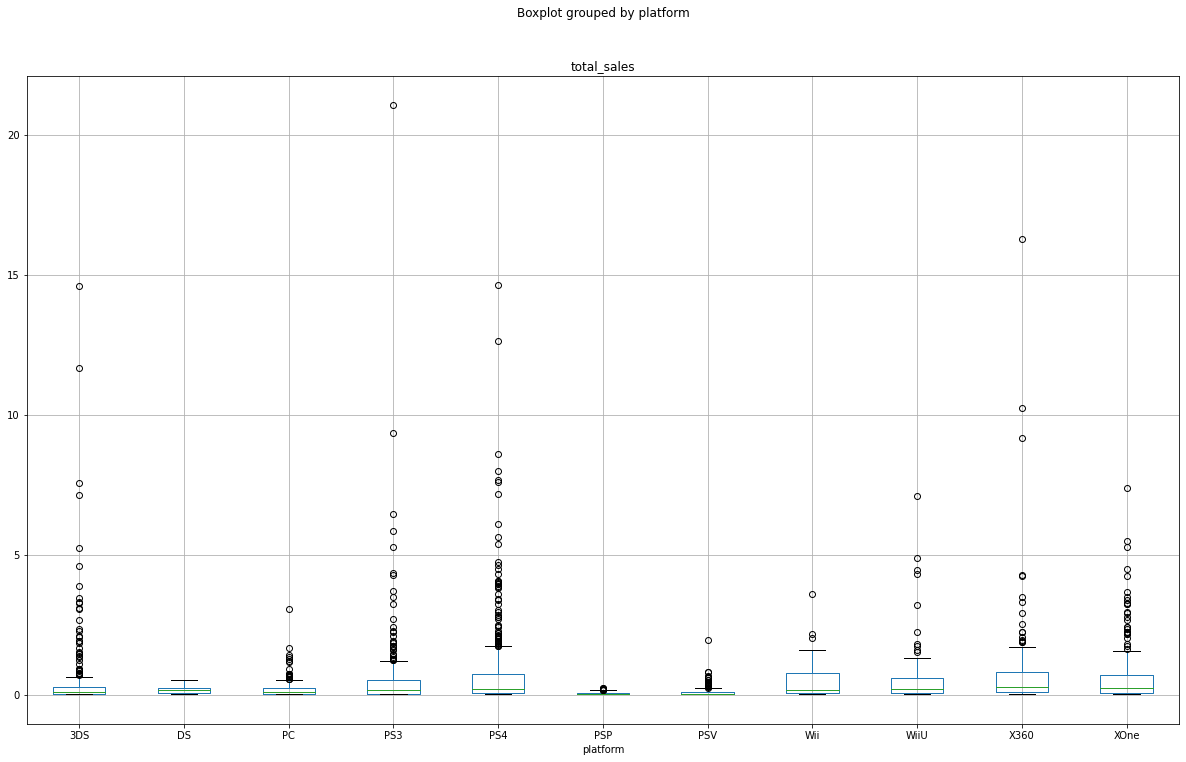

In [33]:
df_actual.boxplot(column = 'total_sales', by='platform', figsize=(20,12))# ящик с усами по глобальным продажам в разбивке по платформам

На графике "ящик с усами" можно увидеть, что почти на каждой платформе есть игры, которые продаются намного лучше, чем другие - вбросы выборки здесь это именно игры с большими продажами. Особенно это заметно у наиболее популярных платформ, можно сказать, что эти вбросы и продают консоль по большей части. Самая большая разница со средним имею некоторые игры с платформы WiiU

<AxesSubplot:title={'center':'total_sales'}, xlabel='platform'>

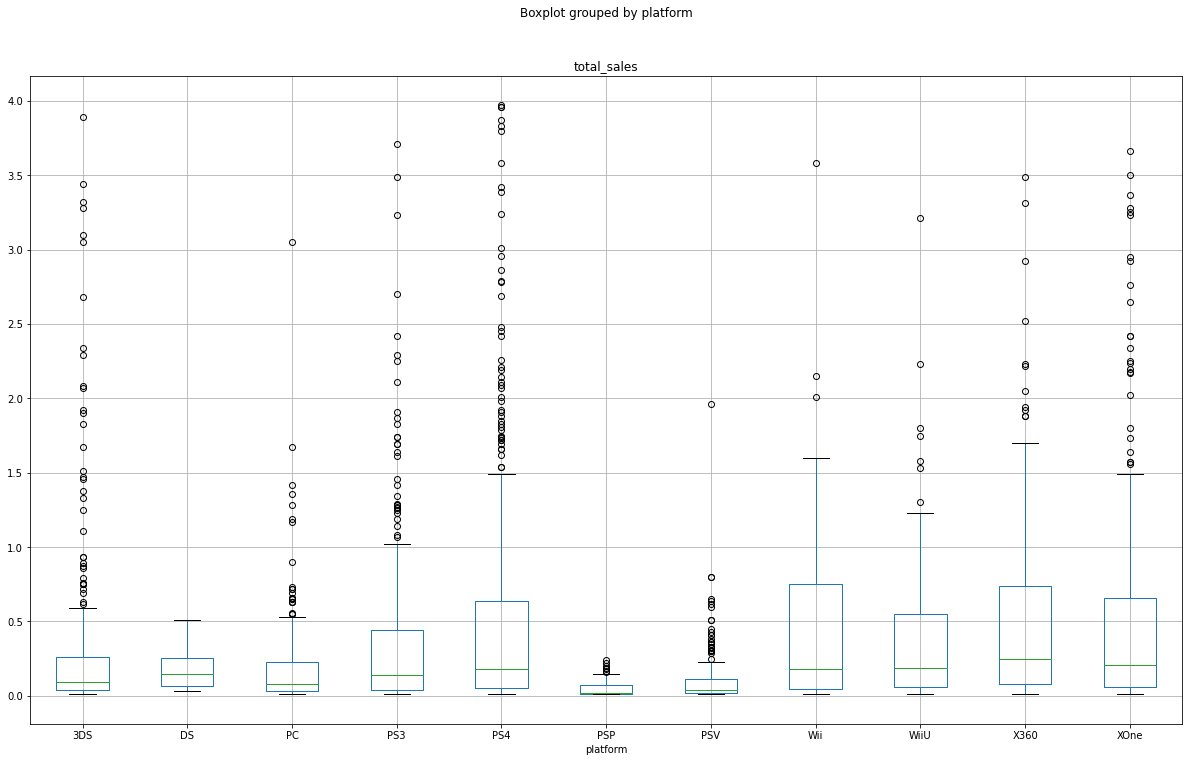

In [34]:
df_actual.query('total_sales < 4').boxplot(column = 'total_sales', by='platform', figsize=(20,12))# ящик с усами по глобальным продажам в разбивке по платформам без выбросов

В этом графике ограничили значения продаж игр до 4, чтобы сделать его более информативным убрав слишком большие по значениям вбросы<br>по графику видно, на каких платформах продажи игр имеют медианное значение больше и где игры в среднем лучше продаются - PS4, PS3, X360, XOne, Wii и WiiU

#### Посмотрим как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков, возьмем самую популярную - PS4

<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

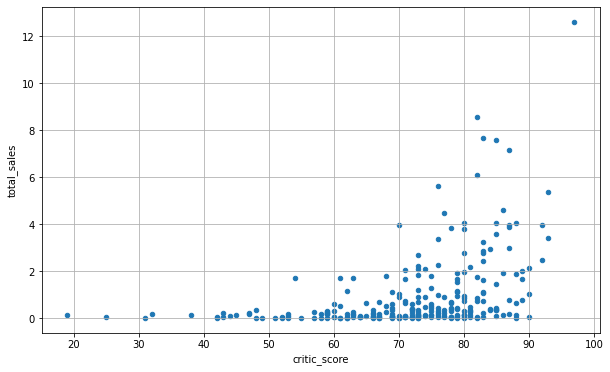

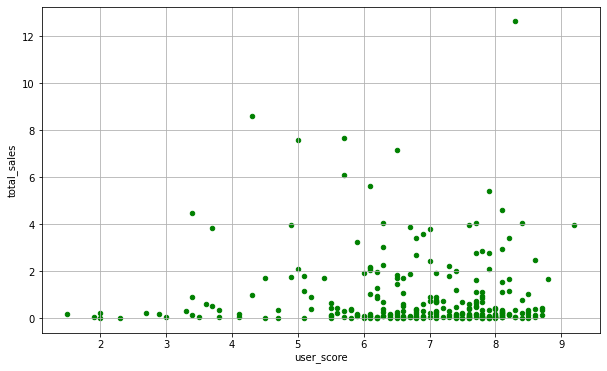

In [35]:
df_actual.query('platform == "PS4"').plot(y='total_sales', x='critic_score', kind='scatter', figsize=(10,6), grid=True)# строим график рассеяния по срезу
df_actual.query('platform == "PS4"').plot(y='total_sales', x='user_score', kind='scatter', figsize=(10,6), grid=True,c='g')

In [36]:
df_actual.query('platform == "PS4"').loc[:, ['critic_score','total_sales']].corr()# смотрим корреляцию между столбцами critic_score и total_sales

,critic_score,total_sales
critic_score,1.000000,0.406568
total_sales,0.406568,1.000000


In [37]:
df_actual.query('platform == "PS4"').loc[:, ['user_score','total_sales']].corr()# смотрим корреляцию между столбцами user_score и total_sales

,user_score,total_sales
user_score,1.000000,-0.031957
total_sales,-0.031957,1.000000


Корреляция между столбцами critic_score и total_sales по платформе PS4 - 0.4, что является низким уровнем. Однако, если смотреть на график, то можно увидеть, что игры, которые получили хорошую оценку у критиков, имеют огромные продажи - игра с оценкой 97 является самой продаваемой игрой на платформе, а количество игр с продажами выше среднего чаще появляются, если оценка критиков больше 70. Можно сказать, что отдельно взятая игра может продаться намного лучше с высокой оценкой критиков, однако большинство игр даже с высокой оценкой могут не принести большой прибыли.<br>С оценками пользователей немного другие результаты, на графике видно, что есть игры с низкой оценкой пользователей, но с высокими продажами. Это может значить, что игру купили из-за высокой оценки критиков, а сама игра оказалась посредственной. В остальном тенденция сравнима с зависимостью оценок критиков и продаж. Корреляция очень слабая, почти отсутствует.<br>Сравним с другими платформами из выделенных потенциальных

**XOne**

<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

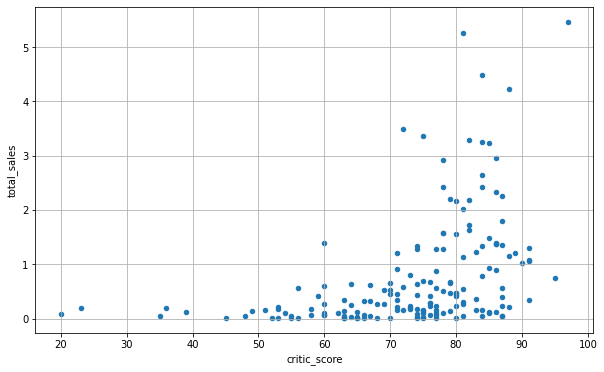

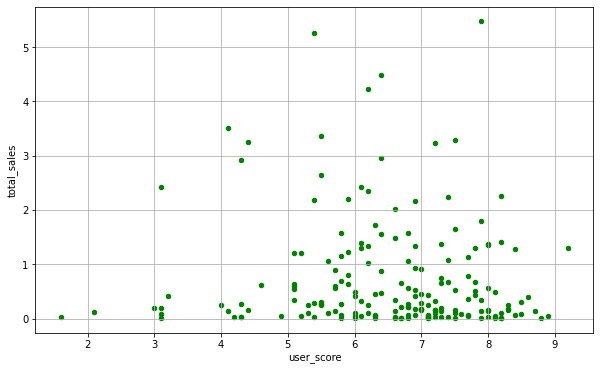

In [38]:
df_actual.query('platform == "XOne"').plot(y='total_sales', x='critic_score', kind='scatter', figsize=(10,6), grid=True)
df_actual.query('platform == "XOne"').plot(y='total_sales', x='user_score', kind='scatter', figsize=(10,6), grid=True,c='g')

In [39]:
df_actual.query('platform == "XOne"').loc[:, ['critic_score', 'total_sales']].corr()

,critic_score,total_sales
critic_score,1.000000,0.416998
total_sales,0.416998,1.000000


In [40]:
df_actual.query('platform == "XOne"').loc[:, ['user_score','total_sales']].corr()

,user_score,total_sales
user_score,1.000000,-0.068925
total_sales,-0.068925,1.000000


**3DS**

<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

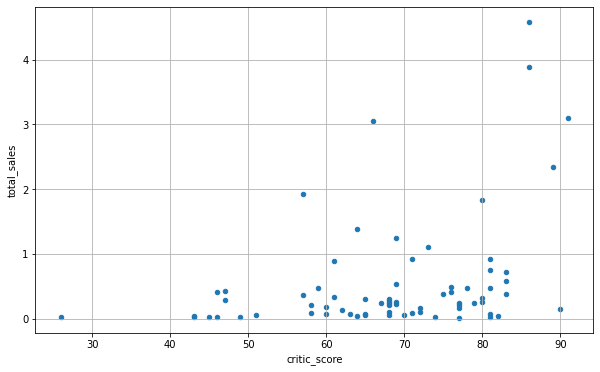

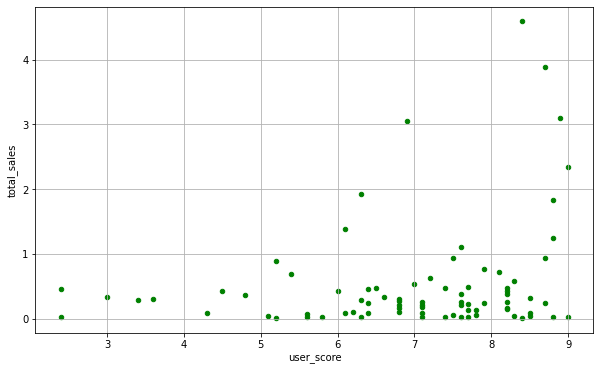

In [41]:
df_actual.query('platform == "3DS"').plot(y='total_sales', x='critic_score', kind='scatter', figsize=(10,6), grid=True)
df_actual.query('platform == "3DS"').plot(y='total_sales', x='user_score', kind='scatter', figsize=(10,6), grid=True,c='g')

In [42]:
df_actual.query('platform == "3DS"').loc[:, ['critic_score', 'total_sales']].corr()

,critic_score,total_sales
critic_score,1.000000,0.357057
total_sales,0.357057,1.000000


In [43]:
df_actual.query('platform == "3DS"').loc[:, ['user_score','total_sales']].corr()

,user_score,total_sales
user_score,1.000000,0.241504
total_sales,0.241504,1.000000


**PC**

<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

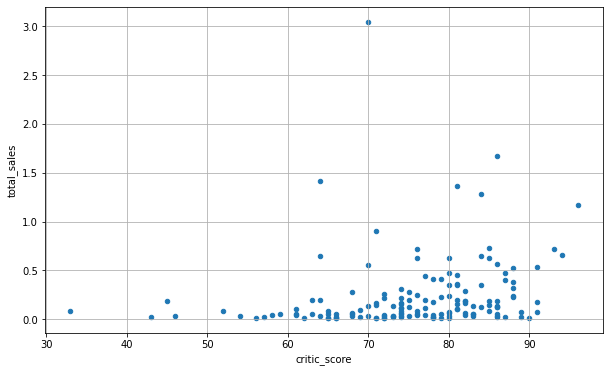

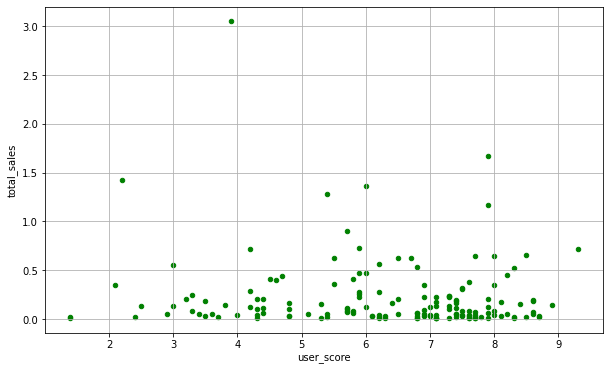

In [44]:
df_actual.query('platform == "PC"').plot(y='total_sales', x='critic_score', kind='scatter', figsize=(10,6), grid=True)
df_actual.query('platform == "PC"').plot(y='total_sales', x='user_score', kind='scatter', figsize=(10,6), grid=True,c='g')

In [45]:
df_actual.query('platform == "PC"').loc[:, ['critic_score', 'total_sales']].corr()

,critic_score,total_sales
critic_score,1.00000,0.19603
total_sales,0.19603,1.00000


In [46]:
df_actual.query('platform == "PC"').loc[:, ['user_score','total_sales']].corr()

,user_score,total_sales
user_score,1.000000,-0.093842
total_sales,-0.093842,1.000000


Получили схожие результаты по другим платформам, на PC корреляция еще ниже, это может быть связано с отсутствием на платформе эксклюзивных консольных игры, которые обычно имеют высокие оценки и "продают" платформу<br>На платформе 3DS нет выделяющихся высоких продаж у игр с низким пользовательским рейтингом и корреляция выше

#### Распределение игр по жанрам

In [47]:
df_actual.pivot_table(values='total_sales', index='genre', aggfunc=['median','mean'])#сводная таблица по количеству и средним и медианным продажам игр по жанрам

,median,mean
,total_sales,total_sales
genre,,
Action,0.110,0.420196
Adventure,0.030,0.096490
Fighting,0.125,0.441375
Misc,0.100,0.405290
Platform,0.225,0.576081
Puzzle,0.060,0.186471
Racing,0.120,0.469294
Role-Playing,0.125,0.499623


<AxesSubplot:xlabel='genre'>

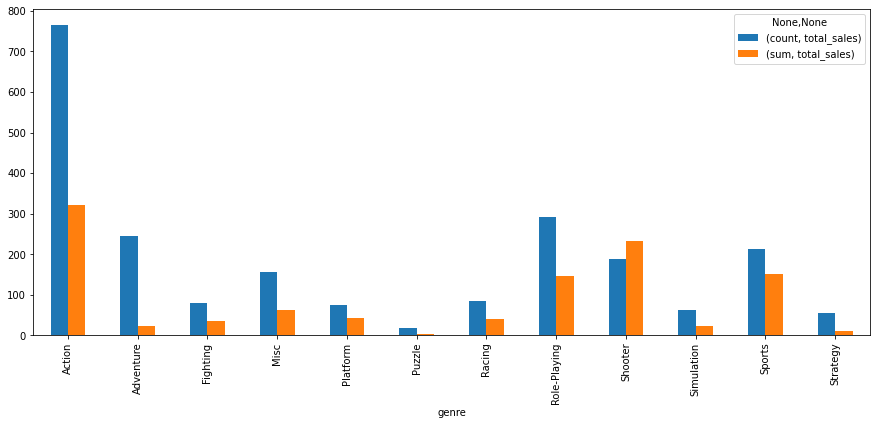

In [48]:
df_actual.pivot_table(values='total_sales', index='genre', aggfunc=['count','sum']).plot(kind='bar', figsize=(15,6))# столбчатая диаграмма по сводной таблице

По сводной таблице видно, что, чем больше игр выпущено в определенном жанре, тем больше его продажи. Абсолютным фаворитом является жанр action, здесь больше всего игр и продаж<br>Самым малочисленным жанром является игры-пазлы, а меньше всего продаж у стратегий<br>Отдельно можно выделить то, что у игр жанра adventure довольно много, однако прибыли они приносят очень мало<br>Спортивные игры приносят довольно много прибыли, хотя их почти в два раза меньше, чем игр жанра action<br>У игр жанра шутер очень близкие значения в обоих столбцах - можно сказать, что в среднем каждый шутер стабильно приносит одинаковую прибыль<br>Построим еще один график со средним и медианой продаж, чтобы проверить предположения


<AxesSubplot:xlabel='genre'>

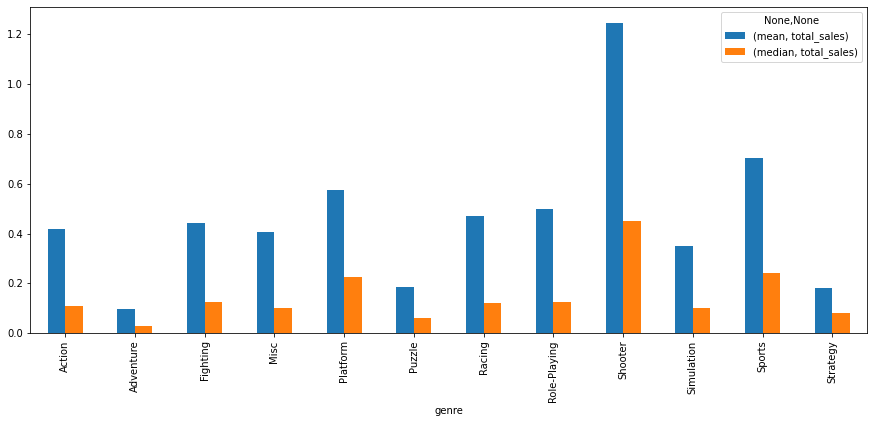

In [49]:
df_actual.pivot_table(values='total_sales', index='genre', aggfunc=['mean','median']).plot(kind='bar', figsize=(15,6))# столбчатая диаграмма по сводной таблице

На графике видно, что, при больших суммах продаж, средняя игра в жанре action в среднем приносит не такой большой доход, берет количеством. Самым прибыльным жанром оказался shooter, sports и platform, если смотреть по медианному значению. В жанрах, где среднее сильно превышает медиану, есть игры, которые очень сильно превзошли продажи большинства игры, их мы видели на графике с усами.

## 4. Портрет пользователя каждого региона

### Регион NA

In [50]:
df_actual.pivot_table(values='na_sales', index='platform', aggfunc='sum')# сводная таблица по платформам в регионе NA

,na_sales
platform,
3DS,38.20
DS,0.57
PC,11.11
PS3,63.50
PS4,108.74
PSP,0.00
PSV,5.04
Wii,6.56
WiiU,29.21


<AxesSubplot:xlabel='platform'>

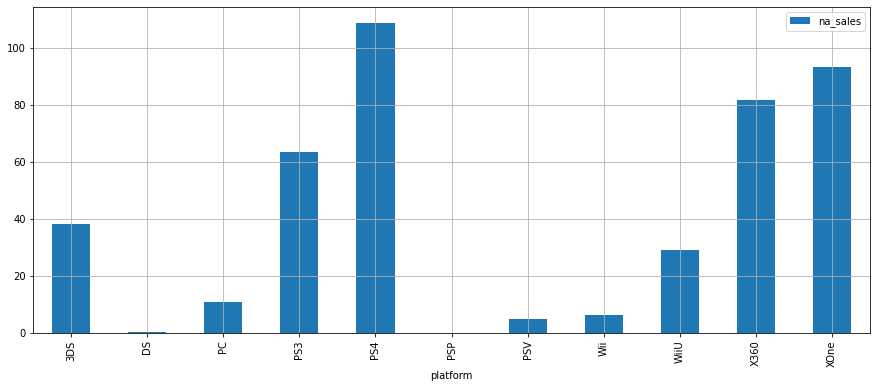

In [51]:
df_actual.pivot_table(values='na_sales', index='platform', aggfunc='sum').plot(kind='bar', figsize=(15,6), grid=True)# столбчатая диаграмма по платформам в регионе NA

In [52]:
df_actual.pivot_table(values='na_sales', index='genre', aggfunc='sum')# сводная таблица по жанрам в регионе NA

,na_sales
genre,
Action,126.05
Adventure,7.14
Fighting,15.55
Misc,27.49
Platform,18.14
Puzzle,0.83
Racing,12.96
Role-Playing,46.40
Shooter,109.74


<AxesSubplot:xlabel='genre'>

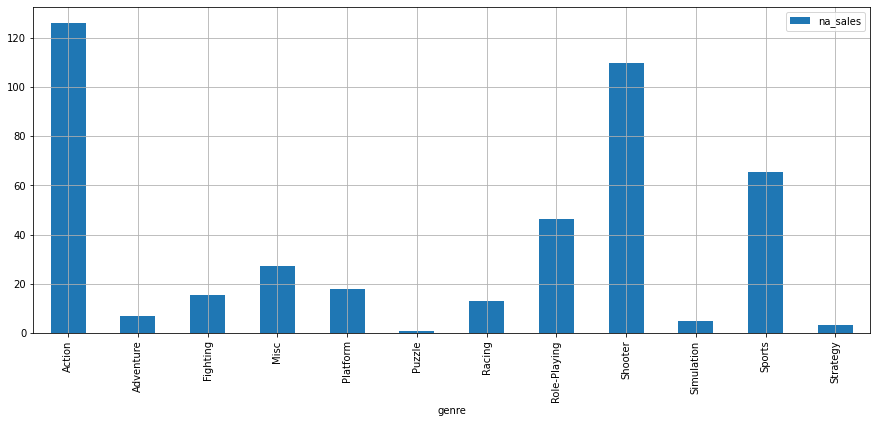

In [53]:
df_actual.pivot_table(values='na_sales', index='genre', aggfunc='sum').plot(kind='bar', figsize=(15,6), grid=True)# столбчатая диаграмма по жанрам в регионе NA

Топ 5 платформ в регионе NA - **PS4, XOne, X360, PS3, 3DS**<br>Топ 5 жанров в регионе NA - **Action, Shooter, Sports, Role-playing, Misc**

In [54]:
na_pivot = df_actual.pivot_table(values='na_sales', columns='rating', aggfunc='sum')# продажи в зависимости от возрастной категории
na_pivot['no_rating'] = df_actual.query('rating.isna() and na_sales > 0')['na_sales'].sum()# добавляем столбец с суммой продаж игр без рейтинга
na_pivot

rating,E,E10+,M,T,no_rating
na_sales,79.05,54.24,165.21,49.79,89.42


In [55]:
na_pivot['no_rating'] / na_pivot.sum(axis=1)#доля продаж игр без рейтинга в Японии

na_sales    0.204291
dtype: float64

In [56]:
df_actual.query('rating.isna() and na_sales > 0')['na_sales'].count() \
/ df_actual.query('na_sales > 0')['na_sales'].count()# доля игр без рейтинга в na

0.22765469824293355

Рейтинг влияет на продажи следующим образом - чем больше людей попадает в рамки рейтинга, тем больше у игры продаж. В регионе NA рейтинг достаточно важен при прогнозирвоании продаж, около 20 процентов игр выходят без рейтинга, такая же доля продаж у этих игр

### Регион EU

In [57]:
df_actual.pivot_table(values='eu_sales', index='platform', aggfunc='sum')# сводная таблица по платформам в регионе EU

,eu_sales
platform,
3DS,30.96
DS,0.85
PC,25.36
PS3,67.81
PS4,141.09
PSP,0.17
PSV,6.10
Wii,5.93
WiiU,19.85


<AxesSubplot:xlabel='platform'>

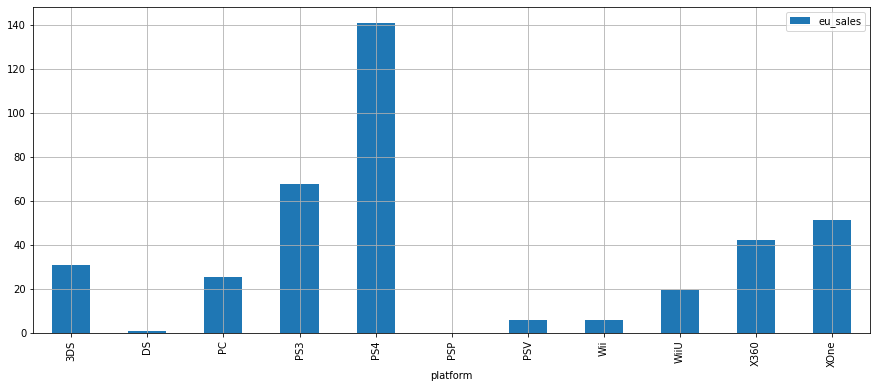

In [58]:
df_actual.pivot_table(values='eu_sales', index='platform', aggfunc='sum').plot(kind='bar', figsize=(15,6), grid=True)# столбчатая диаграмма по платформам в регионе EU

In [59]:
df_actual.pivot_table(values='eu_sales', index='genre', aggfunc='sum')# сводная таблица по жанрам в регионе EU

,eu_sales
genre,
Action,118.13
Adventure,8.25
Fighting,8.55
Misc,20.04
Platform,15.58
Puzzle,1.00
Racing,20.19
Role-Playing,36.97
Shooter,87.86


<AxesSubplot:xlabel='genre'>

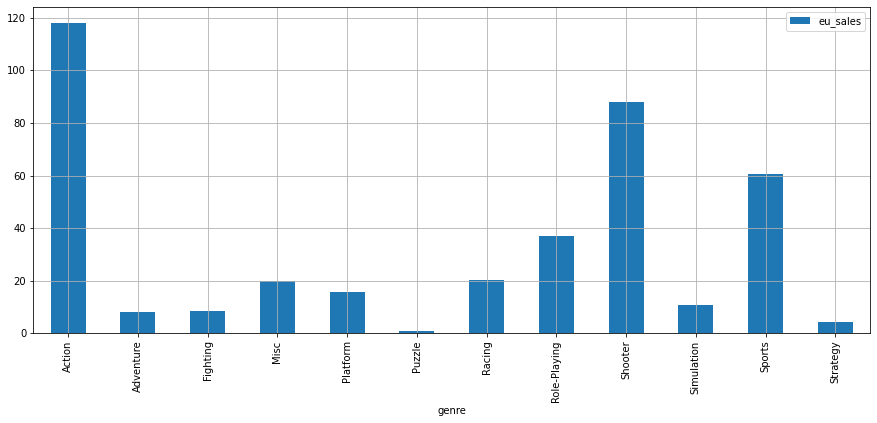

In [60]:
df_actual.pivot_table(values='eu_sales', index='genre', aggfunc='sum').plot(kind='bar', figsize=(15,6), grid=True)# столбчатая диаграмма по жанрам в регионе EU

Топ 5 платформ в регионе EU - **PS4, PS3, XOne, X360, 3DS**<br>Топ 5 жанров в регионе EU - **Action, Shooter, Sports, Role-Playing, Racing**

In [61]:
eu_pivot = df_actual.pivot_table(values='eu_sales', columns='rating', aggfunc='sum')# продажи в зависимости от возрастной категории
eu_pivot['no_rating'] = df_actual.query('rating.isna() and eu_sales > 0')['eu_sales'].sum()# добавляем столбец с суммой продаж игр без рейтинга
eu_pivot

rating,E,E10+,M,T,no_rating
eu_sales,83.36,42.69,145.32,41.95,78.91


In [62]:
eu_pivot['no_rating'] / eu_pivot.sum(axis=1)#доля продаж игр без рейтинга в Японии

eu_sales    0.201183
dtype: float64

In [63]:
df_actual.query('rating.isna() and eu_sales > 0')['eu_sales'].count() \
/ df_actual.query('eu_sales > 0')['eu_sales'].count()# доля игр без рейтинга в eu

0.23628691983122363

Результат схож с регионом NA, рейтинг имеет влияние на продажи в EU

### Регион JP

In [64]:
df_actual.pivot_table(values='jp_sales', index='platform', aggfunc='sum')# сводная таблица по платформам в регионе JP

,jp_sales
platform,
3DS,67.81
DS,0.00
PC,0.00
PS3,23.35
PS4,15.96
PSP,3.29
PSV,18.59
Wii,0.05
WiiU,10.88


<AxesSubplot:xlabel='platform'>

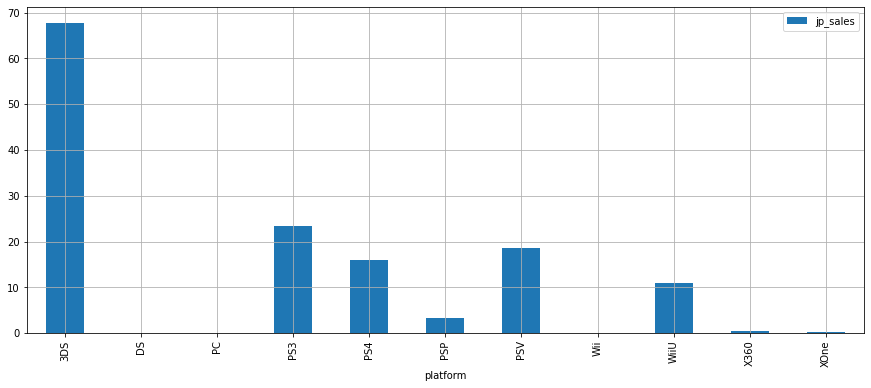

In [65]:
df_actual.pivot_table(values='jp_sales', index='platform', aggfunc='sum').plot(kind='bar', figsize=(15,6), grid=True)# столбчатая диаграмма по платформам в регионе JP

In [66]:
df_actual.pivot_table(values='jp_sales', index='genre', aggfunc='sum')# сводная таблица по жанрам в регионе JP

,jp_sales
genre,
Action,40.49
Adventure,5.82
Fighting,7.65
Misc,9.20
Platform,4.79
Puzzle,1.18
Racing,2.30
Role-Playing,51.04
Shooter,6.61


<AxesSubplot:xlabel='genre'>

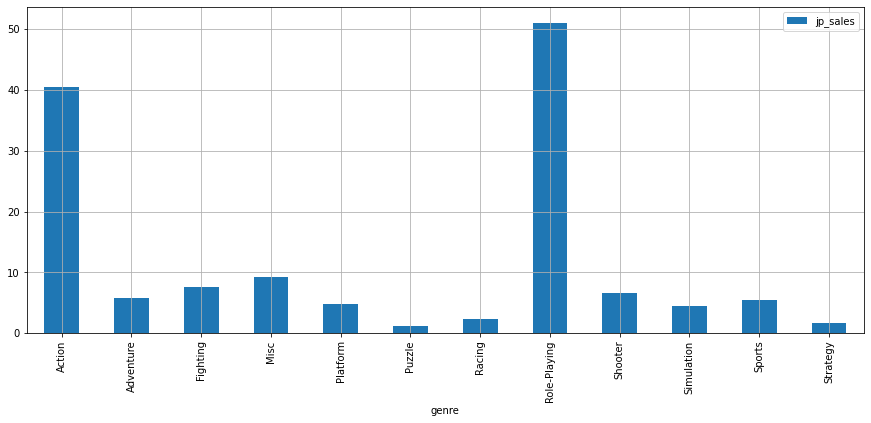

In [67]:
df_actual.pivot_table(values='jp_sales', index='genre', aggfunc='sum').plot(kind='bar', figsize=(15,6), grid=True)# столбчатая диаграмма по жанрам в регионе JP

Топ 5 платформ в регионе JP - **3DS, PS3, PSV, PS4, WiiU**<br>Топ 5 жанров в регионе JP - **Role-Playing, Action, Misc, Fighting, Shooter**

In [68]:
jp_pivot = df_actual.pivot_table(values='jp_sales', columns='rating', aggfunc='sum')# продажи в зависимости от возрастной категории
jp_pivot['no_rating'] = df_actual.query('rating.isna() and jp_sales > 0')['jp_sales'].sum()# добавляем столбец с суммой продаж игр без рейтинга
jp_pivot

rating,E,E10+,M,T,no_rating
jp_sales,15.14,5.89,14.11,20.59,85.05


In [69]:
jp_pivot['no_rating'] / jp_pivot.sum(axis=1)#доля продаж игр без рейтинга в Японии

jp_sales    0.604134
dtype: float64

In [70]:
df_actual.query('rating.isna() and jp_sales > 0')['jp_sales'].count() \
/ df_actual.query('jp_sales > 0')['jp_sales'].count()# доля игр без рейтинга в jp

0.5998315080033698

60 процентов продаж и такое же количество в регионе JP приходится на игры вообще без рейтинга, его влияние в регионе незначительно, можно не учитывать при прогнозе

В европейском и американском регионах самые популярные платформы примерно одни и те же, однако в первом больше предпочитают PS, а во втором Xbox. В Японии американские Xbox почти не имеют продаж, а в топе только местная продукция, особенно приставки от Nintendo.<br>Во всех регионах в топе есть жанры Action, Role-Playing и Shooter. В отличие от других регионов в Европе предпочитают гоночные игры. В Японии хорошо продаются только Role-Playing и Action.


## 5. Проверка гипотезы

#### H_0: **Средние пользовательские рейтинги (user_score) платформы Xbox One = средние пользовательские рейтинги (user_score) PC**<br> H_a: **Средние пользовательские рейтинги (user_score) платформы Xbox One ≠ средние пользовательские рейтинги (user_score) PC**<br> alpha = 0.05

Для проверки гипотезы возьмем данные от 2013 года, так как платформа XOne вышла в этом году

In [71]:
from scipy import stats as st

In [72]:
var1 = df_actual.query('platform=="XOne" and user_score != "tbd" and user_score.notna() and year_of_release >= 2013')['user_score'].astype('float64')# средние пользовательские рейтинги платформы Xbox One
var2 = df_actual.query('platform=="PC" and user_score != "tbd" and user_score.notna() and year_of_release >= 2013')['user_score'].astype('float64')# средние пользовательские рейтинги платформы PC
results = st.ttest_ind(var1, var2, equal_var = False)# проводим t-test Стьюдента для двух выборок по актуальным данным
alpha = 0.05
print(results.pvalue) # вывод значения p-value на экран
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу ')
# условный оператор с выводом строки с ответом

0.14759594013430463
Не получилось отвергнуть нулевую гипотезу 


За основу нулевой гипотезы взяли типичную в статистике - *средние двух генеральны совокупностей равны между собой*. Так как нулевая гипотеза всегда формулируется со знаком равенства, альтернативная гипотеза получилась со знаком ≠ <br> Критерием был выбран t-критерий Стьюдента (независимые выборки), так как оценки игр на разных платформах не зависят друг от друга, в основном на них играют разные пользователи и оценивают игру они несмотря на возможные ее преимущества на другой платформе

#### H_0: **Средние пользовательские рейтинги (user_score) жанров Action = средние пользовательские рейтинги (user_score) жанров Sports**<br> H_a: **Средние пользовательские рейтинги (user_score) жанров Action ≠ средние пользовательские рейтинги (user_score) жанров Sports**<br> alpha = 0.05

In [73]:
var1 = df_actual.query('genre=="Action" and user_score != "tbd" and user_score.notna()')['user_score'].astype('float64')# средние пользовательские рейтинги жанра action
var2 = df_actual.query('genre=="Sports" and user_score != "tbd" and user_score.notna()')['user_score'].astype('float64')# средние пользовательские рейтинги жанра sports
results = st.ttest_ind(var1, var2, equal_var = False)# проводим t-test Стьюдента для двух выборок по актуальным данным
alpha = 0.05
print(results.pvalue) # вывод значения p-value на экран
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу ')
# условный оператор с выводом строки с ответом

1.4460039700704315e-20
Отвергаем нулевую гипотезу


За основу нулевой гипотезы взяли типичную в статистике - *средние двух генеральны совокупностей равны между собой*. Так как нулевая гипотеза всегда формулируется со знаком равенства, альтернативная гипотеза получилась со знаком ≠ <br> Критерием был выбран t-критерий Стьюдента (независимые выборки), так как жанры игр не связаны между собой

В результате проверки гипотез выяснили, что средние пользовательские рейтинги платформ Xbox One и PC могут быть одинаковыми, а средние пользовательские рейтинги жанров Action и Sports не одинаковые

## 6. Общий вывод

В рамках проекта была проделана следующая работа с данными:
1. **Выполнен общий обзор данных**:
Наблюдается постепенный спад количества выпущенных игр после пика в 2008-2009 годах, большинство игр оценены критиками на 60-80 баллов, пользователями от 6.5 до 8.5
2. **Выполнена предобработка данных**:
Выявили закономерность пропусков в столбцах с оценками и рейтингом, предположительно некоторые игры отсутствуют в изначальном источнике данных с этими показателями. Был добавлен столбец с суммарными продажами во всех регионах
3. **Выбор актуальных данных и анализ продаж**
Актуальными для прогнозирования были выбраны данные за последние **10 лет**, в некоторых случаях брались отрезки времени от начала жизненного цикла наиболее перспективных консолей. Выяснили, что платформы имеют “цикл жизни” в 10 лет и выбраны самые прибыльные и перспективные - **PS4, XOne, 3DS и PC**. Выяснили, что высокий рейтинг почти не влияет на продаваемость игры, однако у хорошо оцененных игр больше шанс “выстрелить” и продаться большим тиражом. Абсолютным фаворитом жанров является action, здесь больше всего игр и продаж. Самым малочисленным жанром является игры-пазлы, а меньше всего продаж у стратегий. Отдельно можно выделить то, что у игр жанра adventure довольно много, однако прибыли они приносят мало. Спортивные игры приносят довольно много прибыли, хотя их почти в два раза меньше, чем игр жанра action. У игр жанра шутер очень близкие значения в обоих столбцах - можно сказать, что в среднем каждый шутер стабильно приносит одинаковую прибыль
4. **Портрет пользователя**
<br>Топ 5 платформ в регионе NA - **PS4, XOne, X360, PS3, 3DS**
<br>Топ 5 жанров в регионе NA - **Action, Shooter, Sports, Role-playing, Misc**
<br>Топ 5 платформ в регионе EU - **PS4, PS3, XOne, X360, 3DS**
<br>Топ 5 жанров в регионе EU - **Action, Shooter, Sports, Role-Playing, Racing**
<br>Топ 5 платформ в регионе JP - **3DS, PS3, PSV, PS4, WiiU**
<br>Топ 5 жанров в регионе JP - **Role-Playing, Role-Playing, Action, Misc, Fighting, Shooter**
<br>В дальнейшем наиболее актуальными консолями станут платформы от Microsoft в Америке и Европе(xbox), от Sony во всех регионах(playstation) и от Nintendo(wii, ds) в Японии(в других регионах тоже будут иметь высокое присутствие)
5. **Проверка гипотез**
В результате проверки гипотез выяснили, что средние пользовательские рейтинги платформ Xbox One и PC могут быть одинаковыми, а средние пользовательские рейтинги жанров Action и Sports не одинаковые


В итоге можно определить следующий принцип работы с данными при прогнозировании продаж: для анализа продаж лучше всего брать хорошо продаваемые платформы, которые были выпущены не более 5 лет назад. Они станут основой для выработки маркетинговой стратегии.<br> Продаваемость игр по жанрам является стабильной величиной, нужно обратить внимание на жанры **action, sports и shooter**, отдельно в Японии на **Role-Playing и Platform**<br>Обратить внимание стоит на игры, которые оценены не менее чем на 60 у критиков и 6.5 у пользователей, игры с высокими оценками потенциально имеют шанс принести огромную прибыль, однако эту гипотезу еще предстоит проверить<br>Оценка по ESRB в NA и EU
 тоже имеет значение - чем больше людей попадает в рамки рейтинга, тем больше у игры продаж, если это не игры для "дошкольников"<br> Также, при планировании компании на следующий год, стоит обратить внимание на анонсы различных новых платформ - в первый год после выпуска продажи на ней всегда довольно хорошие, если консоль не окажется совсем провальной